# Hyperparameter Grid Search


## Imports and Dataset

In [2]:
#!pip install catboost

In [41]:
# Core
import numpy as np
import pandas as pd

# Sklearn utilities
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score

# Regression models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    BayesianRidge, HuberRegressor, PoissonRegressor,
    TweedieRegressor, PassiveAggressiveRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    ExtraTreesRegressor, AdaBoostRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

# Classification models
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier,
    SGDClassifier, Perceptron
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis
)
from sklearn.gaussian_process import GaussianProcessClassifier

# External models
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")


In [43]:
df = pd.read_csv("D:/GitHub/Data-Science-Techniques/datasets/Superviased-regression/synthetic_customer_ltv_regression_complete.csv")
df.head()

,customer_id,signup_year,signup_month,days_since_signup,tenure_months,avg_monthly_spend,purchase_frequency,discount_sensitivity,returns_rate,email_open_rate,ad_click_rate,loyalty_score,support_tickets,churn_risk_score,credit_score_proxy,customer_lifetime_value
0,1,2022,8,899.094991,29,123.916907,3,0.401322,0.043396,0.042156,0.023647,0.123574,1,0.959716,671.029435,2691.193107
1,2,2019,9,2017.615223,66,204.814055,5,0.266840,0.338968,0.540674,0.180153,0.323954,1,0.789270,746.074773,11690.801889
2,3,2020,3,1720.937794,57,218.905816,3,0.028719,0.041845,0.517227,0.173583,0.268430,2,0.533410,601.164043,13094.093874
3,4,2022,3,1001.962036,33,188.028060,4,0.421602,0.140611,0.512366,0.277571,0.498941,3,0.699054,722.688139,6251.644013
4,5,2018,4,2522.620983,84,142.413565,6,0.192419,0.051116,0.462827,0.123844,0.500634,2,0.439348,659.860235,16474.610236


In [45]:
target = "customer_lifetime_value"

X = df.drop(columns=[target, "customer_id"])
y = df[target]


# Regression Models + Hyperparameter Grids

In [48]:
regression_models = {
    "Linear Regression": (
        LinearRegression(),
        {}
    ),

    "Ridge Regression": (
        Ridge(),
        {"alpha": [0.01, 0.1, 1, 10, 100]}
    ),

    "Lasso Regression": (
        Lasso(),
        {"alpha": [0.001, 0.01, 0.1, 1]}
    ),

    "Elastic Net": (
        ElasticNet(),
        {
            "alpha": [0.001, 0.01, 0.1, 1],
            "l1_ratio": [0.2, 0.5, 0.8]
        }
    ),

    "Decision Tree": (
        DecisionTreeRegressor(),
        {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    ),

    "Random Forest": (
        RandomForestRegressor(),
        {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20]
        }
    ),

    "Gradient Boosting": (
        GradientBoostingRegressor(),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    ),

    "XGBoost": (
        XGBRegressor(objective="reg:squarederror"),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 6]
        }
    ),

    "LightGBM": (
        LGBMRegressor(),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "num_leaves": [31, 50]
        }
    ),

    "CatBoost": (
        CatBoostRegressor(verbose=0),
        {
            "iterations": [200, 500],
            "learning_rate": [0.01, 0.1],
            "depth": [4, 6]
        }
    ),

    "SVR": (
        SVR(),
        {
            "C": [0.1, 1, 10],
            "kernel": ["rbf", "linear"]
        }
    ),

    "KNN Regressor": (
        KNeighborsRegressor(),
        {"n_neighbors": [3, 5, 7]}
    ),

    "Bayesian Ridge": (
        BayesianRidge(),
        {}
    ),

    "Huber": (
        HuberRegressor(),
        {"epsilon": [1.1, 1.35, 1.5]}
    ),

    "Extra Trees": (
        ExtraTreesRegressor(),
        {
            "n_estimators": [100, 200],
            "max_depth": [None, 10]
        }
    ),

    "AdaBoost": (
        AdaBoostRegressor(),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1]
        }
    ),

    "Poisson": (
        PoissonRegressor(),
        {"alpha": [0.01, 0.1, 1]}
    ),

    "Tweedie": (
        TweedieRegressor(),
        {
            "power": [1, 1.5, 2],
            "alpha": [0.01, 0.1]
        }
    ),

    "Passive Aggressive": (
        PassiveAggressiveRegressor(),
        {"C": [0.01, 0.1, 1]}
    ),

    "Gaussian Process": (
        GaussianProcessRegressor(),
        {}
    ),
}


## Run GridSearch for Regression

In [51]:
regression_results = {}

for name, (model, params) in regression_models.items():
    print(f"Training {name}...")

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid={f"model__{k}": v for k, v in params.items()},
        cv=5,
        scoring="r2",
        n_jobs=-1
    )

    grid.fit(X, y)

    regression_results[name] = {
        "best_score": grid.best_score_,
        "best_params": grid.best_params_
    }

pd.DataFrame(regression_results).T.sort_values("best_score", ascending=False)


Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Elastic Net...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2442
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 14
[LightGBM] [Info] Start training from score 8369.591546
Training CatBoost...
Training SVR...
Training KNN Regressor...
Training Bayesian Ridge...
Training Huber...
Training Extra Trees...
Training AdaBoost...
Training Poisson...
Training Tweedie...
Training Passive Aggressive...
Training Gaussian Process...


,best_score,best_params
CatBoost,0.977411,"{'model__depth': 6, 'model__iterations': 500, ..."
Gradient Boosting,0.971441,"{'model__learning_rate': 0.1, 'model__max_dept..."
LightGBM,0.971297,"{'model__learning_rate': 0.1, 'model__n_estima..."
Extra Trees,0.963368,"{'model__max_depth': None, 'model__n_estimator..."
Random Forest,0.954032,"{'model__max_depth': None, 'model__n_estimator..."
Decision Tree,0.891902,"{'model__max_depth': 10, 'model__min_samples_s..."
Poisson,0.872994,{'model__alpha': 1}
Tweedie,0.872826,"{'model__alpha': 0.1, 'model__power': 1}"
Elastic Net,0.847058,"{'model__alpha': 0.001, 'model__l1_ratio': 0.2}"
Ridge Regression,0.847055,{'model__alpha': 10}


# Classification Models + Hyperparameters
### Dataset

In [53]:
df = pd.read_csv("D:/GitHub/Data-Science-Techniques/datasets/Supervised-classification/synthetic_credit_default_classification.csv")

df.head()

,customer_id,age,annual_income,credit_utilization,debt_to_income,loan_amount,loan_term_months,num_past_defaults,employment_years,credit_score,default
0,1,59,23283.682822,0.187813,0.245248,20232.165654,24,0,4.575844,689.627408,1
1,2,49,61262.608063,0.291774,0.396763,26484.067591,36,0,3.317515,697.770541,1
2,3,35,60221.743160,0.230557,0.122859,27142.522594,24,1,11.871955,713.721429,0
3,4,63,93603.112731,0.157906,0.635484,1000.000000,12,0,2.256651,655.306417,1
4,5,28,71674.557271,0.167549,0.422446,15254.246561,48,0,6.971270,644.247643,0


In [54]:
target = "default"

X = df.drop(columns=[target, "customer_id"])
y = df[target]


## Grid Search:

In [56]:
classification_models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=500),
        {"C": [0.01, 0.1, 1, 10]}
    ),

    "KNN": (
        KNeighborsClassifier(),
        {"n_neighbors": [3, 5, 7]}
    ),

    "SVM (SVC)": (
        SVC(),
        {
            "C": [0.1, 1, 10],
            "kernel": ["rbf", "linear"]
        }
    ),

    "GaussianNB": (
        GaussianNB(),
        {}
    ),

    "LDA": (
        LinearDiscriminantAnalysis(),
        {}
    ),

    "QDA": (
        QuadraticDiscriminantAnalysis(),
        {}
    ),

    "Perceptron": (
        Perceptron(),
        {"alpha": [0.0001, 0.001, 0.01]}
    ),

    "Ridge Classifier": (
        RidgeClassifier(),
        {"alpha": [0.1, 1, 10]}
    ),

    "SGD": (
        SGDClassifier(),
        {"alpha": [0.0001, 0.001, 0.01]}
    ),

    "Gaussian Process Classifier": (
        GaussianProcessClassifier(),
        {}
    ),
}


## Run GridSearch for Classification

In [58]:
classification_results = {}

for name, (model, params) in classification_models.items():
    print(f"Training {name}...")

    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid={f"model__{k}": v for k, v in params.items()},
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )

    grid.fit(X, y)

    classification_results[name] = {
        "best_score": grid.best_score_,
        "best_params": grid.best_params_
    }

pd.DataFrame(classification_results).T.sort_values("best_score", ascending=False)


Training Logistic Regression...
Training KNN...
Training SVM (SVC)...
Training GaussianNB...
Training LDA...
Training QDA...
Training Perceptron...
Training Ridge Classifier...
Training SGD...
Training Gaussian Process Classifier...


,best_score,best_params
SGD,0.8436,{'model__alpha': 0.01}
Logistic Regression,0.8426,{'model__C': 0.1}
LDA,0.8424,{}
SVM (SVC),0.8422,"{'model__C': 1, 'model__kernel': 'linear'}"
Ridge Classifier,0.841,{'model__alpha': 10}
QDA,0.8382,{}
Gaussian Process Classifier,0.8304,{}
GaussianNB,0.8214,{}
KNN,0.812,{'model__n_neighbors': 7}
Perceptron,0.7836,{'model__alpha': 0.0001}


# Convert Results to DataFrames

In [63]:
# Regression results dataframe
reg_df = (
    pd.DataFrame(regression_results)
    .T
    .reset_index()
    .rename(columns={"index": "Model"})
)

reg_df["best_score"] = reg_df["best_score"].astype(float)

# Classification results dataframe
clf_df = (
    pd.DataFrame(classification_results)
    .T
    .reset_index()
    .rename(columns={"index": "Model"})
)

clf_df["best_score"] = clf_df["best_score"].astype(float)


## Regression Model Comparison Plot (R²)

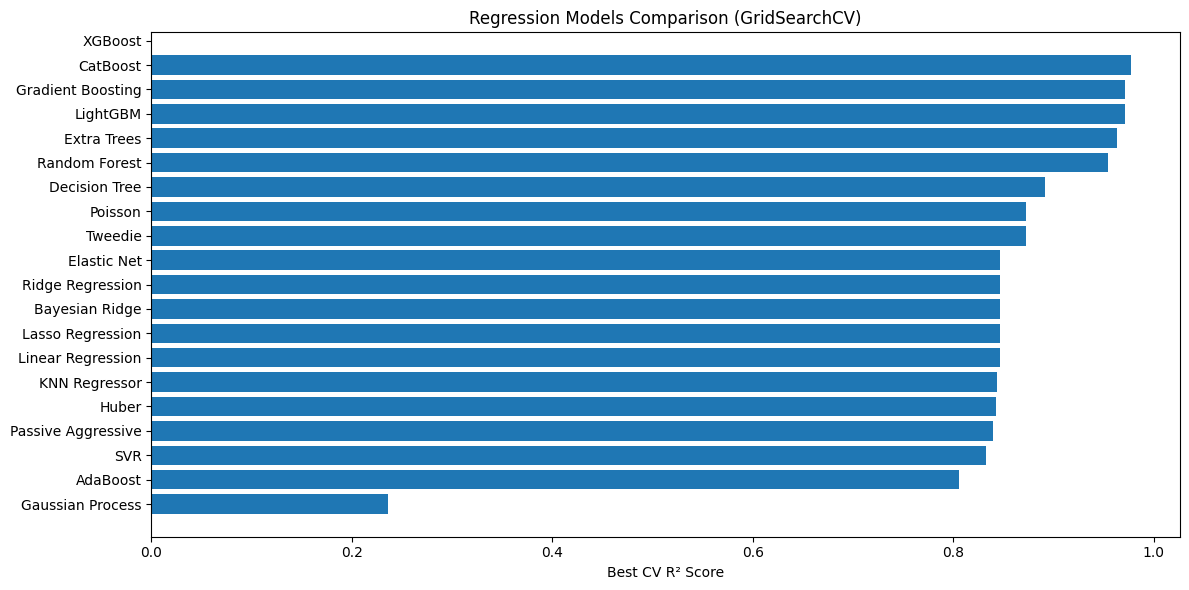

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(reg_df.sort_values("best_score")["Model"],
         reg_df.sort_values("best_score")["best_score"])

plt.xlabel("Best CV R² Score")
plt.title("Regression Models Comparison (GridSearchCV)")
plt.tight_layout()
plt.show()


## Classification Model Comparison Plot (Accuracy)

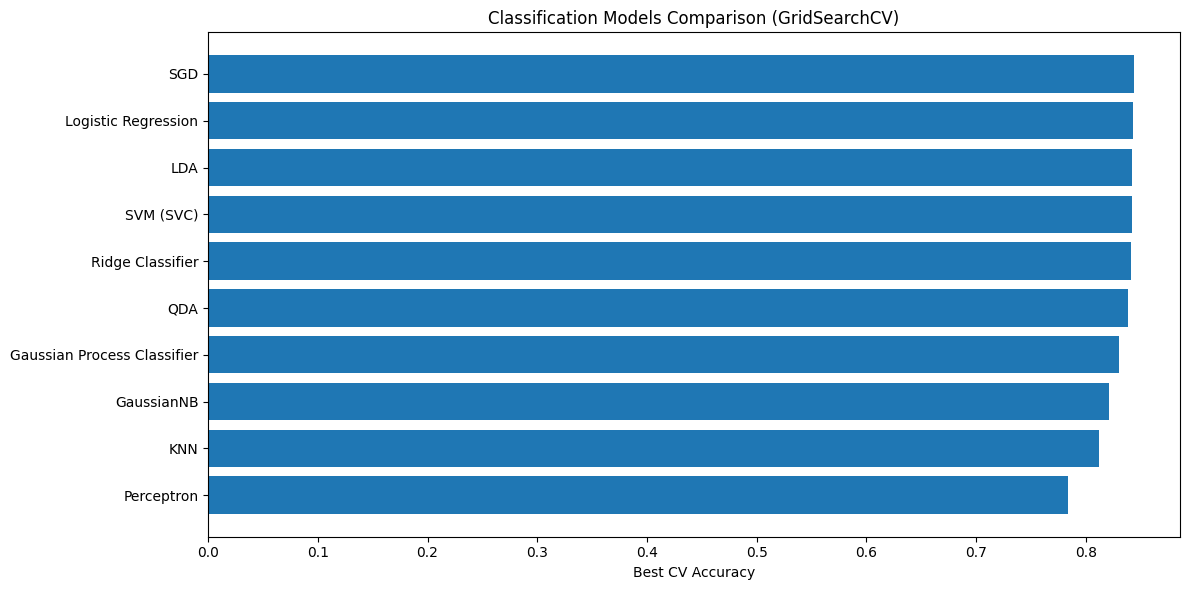

In [67]:
plt.figure(figsize=(12, 6))
plt.barh(clf_df.sort_values("best_score")["Model"],
         clf_df.sort_values("best_score")["best_score"])

plt.xlabel("Best CV Accuracy")
plt.title("Classification Models Comparison (GridSearchCV)")
plt.tight_layout()
plt.show()


## Top-K Models (Auto Ranking)

In [69]:
TOP_K = 5

print("Top Regression Models")
display(
    reg_df.sort_values("best_score", ascending=False)
    .head(TOP_K)[["Model", "best_score", "best_params"]]
)

print("Top Classification Models")
display(
    clf_df.sort_values("best_score", ascending=False)
    .head(TOP_K)[["Model", "best_score", "best_params"]]
)


Top Regression Models


,Model,best_score,best_params
9,CatBoost,0.977411,"{'model__depth': 6, 'model__iterations': 500, ..."
6,Gradient Boosting,0.971441,"{'model__learning_rate': 0.1, 'model__max_dept..."
8,LightGBM,0.971297,"{'model__learning_rate': 0.1, 'model__n_estima..."
14,Extra Trees,0.963368,"{'model__max_depth': None, 'model__n_estimator..."
5,Random Forest,0.954032,"{'model__max_depth': None, 'model__n_estimator..."


Top Classification Models


,Model,best_score,best_params
8,SGD,0.8436,{'model__alpha': 0.01}
0,Logistic Regression,0.8426,{'model__C': 0.1}
4,LDA,0.8424,{}
2,SVM (SVC),0.8422,"{'model__C': 1, 'model__kernel': 'linear'}"
7,Ridge Classifier,0.8410,{'model__alpha': 10}


## Combined Score Table (AutoML-style)

In [ ]:
reg_df["task"] = "Regression"
clf_df["task"] = "Classification"

all_models = pd.concat([reg_df, clf_df], ignore_index=True)

all_models.sort_values("best_score", ascending=False)


## Save Plots Automatically

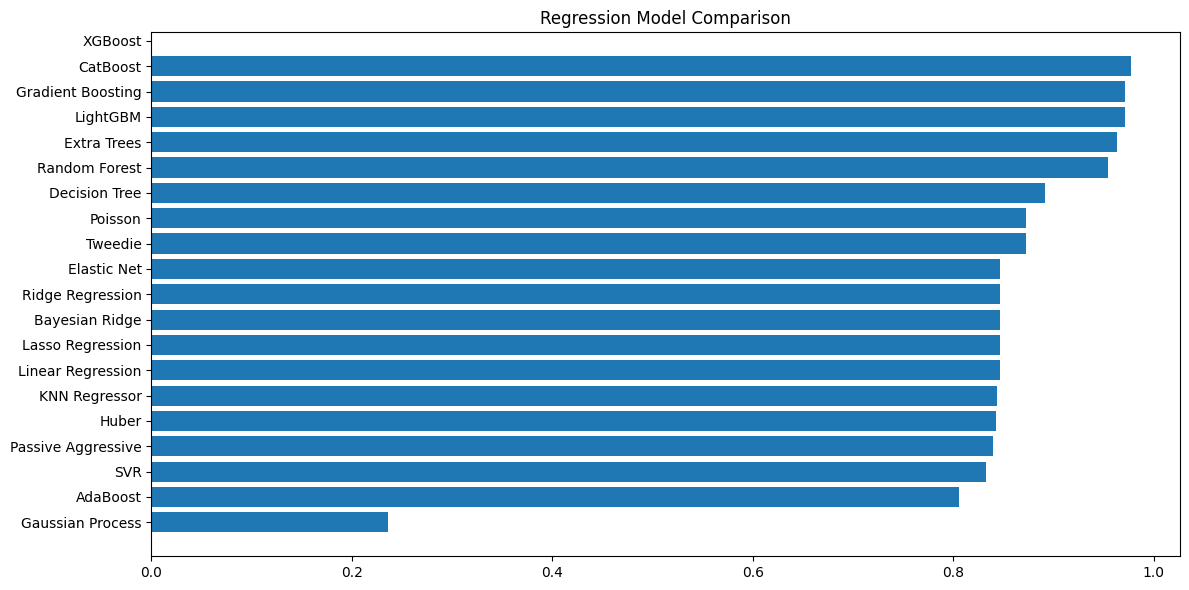

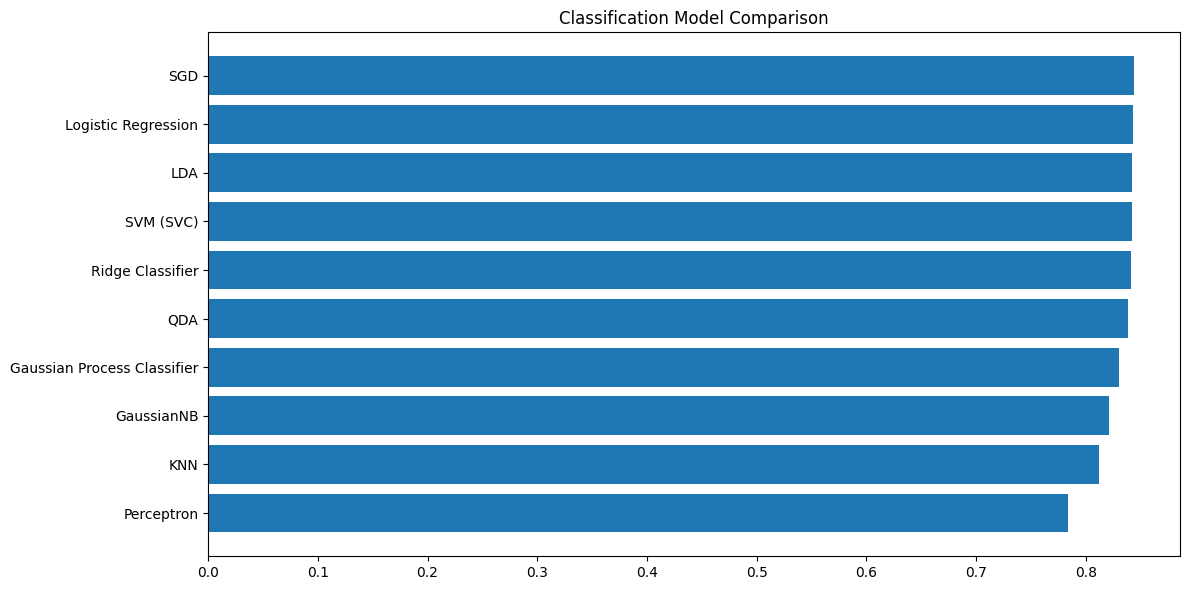

In [85]:
plt.figure(figsize=(12, 6))
plt.barh(reg_df.sort_values("best_score")["Model"],
         reg_df.sort_values("best_score")["best_score"])
plt.title("Regression Model Comparison")
plt.tight_layout()
# plt.savefig("regression_model_comparison.png", dpi=300)
#plt.close()

plt.figure(figsize=(12, 6))
plt.barh(clf_df.sort_values("best_score")["Model"],
         clf_df.sort_values("best_score")["best_score"])
plt.title("Classification Model Comparison")
plt.tight_layout()
# plt.savefig("classification_model_comparison.png", dpi=300)
#plt.close()
